vamos a atrabajar parte del ejericio contenido en: https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

In [2]:
import sklearn

import shap

# a classic housing price dataset
X, y = shap.datasets.california(n_points=1000)

X100 = shap.utils.sample(X, 100)  # 100 instances for use as the background distribution

# a simple linear model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
datos: This dataset consists of 20,640 blocks of houses across California in 1990, where our goal is to predict the natural log of the median home price from 8 different features:

MedInc - median income in block group

HouseAge - median house age in block group

AveRooms - average number of rooms per household

AveBedrms - average number of bedrooms per household

Population - block group population

AveOccup - average number of household members

Latitude - block group latitude

Longitude - block group longitude

In [3]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(5))

Model coefficients:

MedInc = 0.42563
HouseAge = 0.01033
AveRooms = -0.1161
AveBedrms = 0.66385
Population = 3e-05
AveOccup = -0.26096
Latitude = -0.46734
Longitude = -0.46272


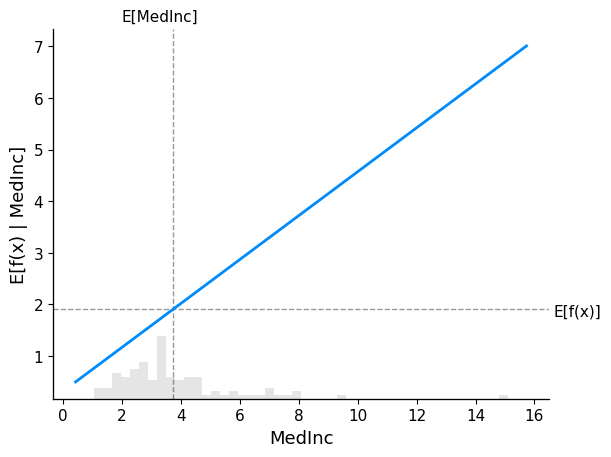

In [8]:
shap.partial_dependence_plot(
    "MedInc",
    model.predict,
    X100,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

ExactExplainer explainer: 1001it [00:11, 33.30it/s]                          


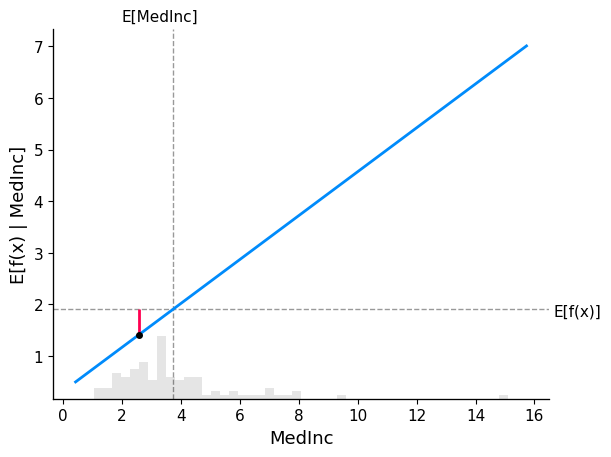

In [10]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X)

# make a standard partial dependence plot
sample_ind = 20
shap.partial_dependence_plot(
    "MedInc",
    model.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    ice=False,
    shap_values=shap_values[sample_ind : sample_ind + 1, :],
)

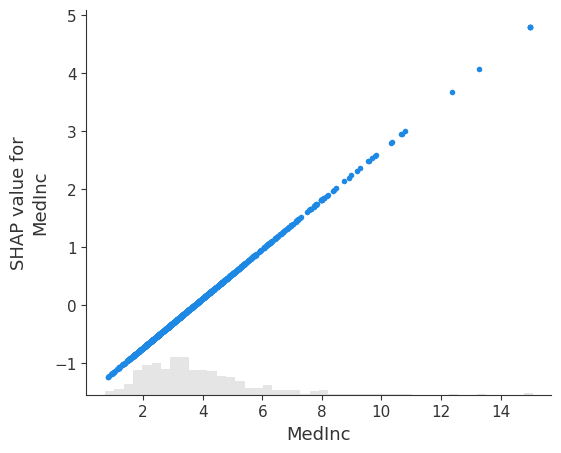

In [11]:
shap.plots.scatter(shap_values[:, "MedInc"])

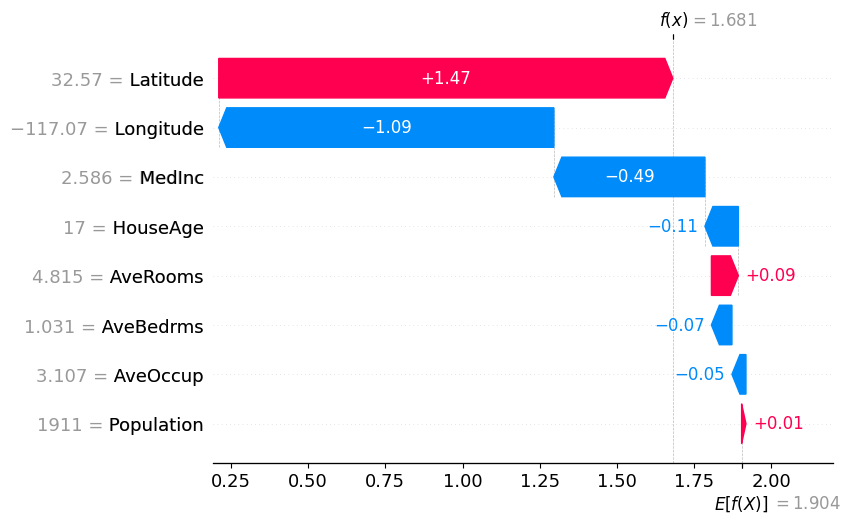

In [12]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

In [14]:
!pip install interpret


     ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
     --------------- ------------------------ 1.6/4.0 MB 10.5 MB/s eta 0:00:01
     ------------------------------------ --- 3.7/4.0 MB 10.4 MB/s eta 0:00:01
     ---------------------------------------- 4.0/4.0 MB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached cffi-1.17.1-cp311-cp311-win_amd64.whl.metadata (1.6 kB)
  Using cached pycparser-2.22-py3-none-any.whl.metadata (943 bytes)
   ---------------------------------------- 0.0/16.6 MB ? eta -:--:--
   ----- ---------------------------------- 2.1/16.6 MB 14.7 MB/s eta 0:00:01
   ----- ---------------------------------- 2.4/16.6 MB 5.4 MB/s eta 0:00:03
   ---------- ----------------------------- 4.2/16.6 MB 6.4 MB/s eta 0:00:02
   ----------- ---------------------------- 4.7/16.6 MB 5.5 MB/s eta 0:00:03
   ---------------- ----------------------- 6.8/16.6 MB 6.4 MB/s eta 0:00

  DEPRECATION: Building 'dash-cytoscape' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'dash-cytoscape'. Discussion can be found at https://github.com/pypa/pip/issues/6334


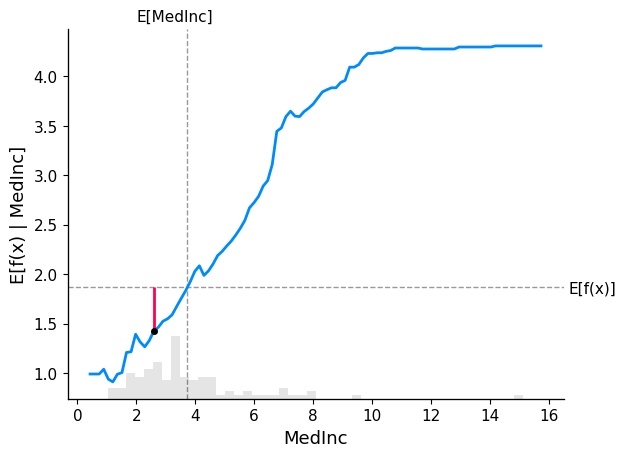

In [15]:
# fit a GAM model to the data
import interpret.glassbox

model_ebm = interpret.glassbox.ExplainableBoostingRegressor(interactions=0)
model_ebm.fit(X, y)

# explain the GAM model with SHAP
explainer_ebm = shap.Explainer(model_ebm.predict, X100)
shap_values_ebm = explainer_ebm(X)

# make a standard partial dependence plot with a single SHAP value overlaid
fig, ax = shap.partial_dependence_plot(
    "MedInc",
    model_ebm.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    ice=False,
    shap_values=shap_values_ebm[sample_ind : sample_ind + 1, :],
)

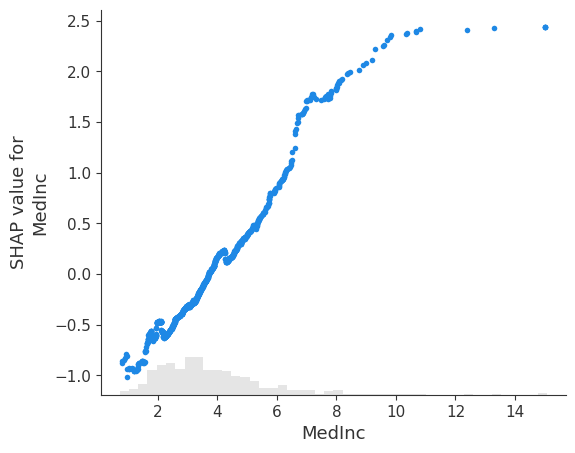

In [16]:
shap.plots.scatter(shap_values_ebm[:, "MedInc"])

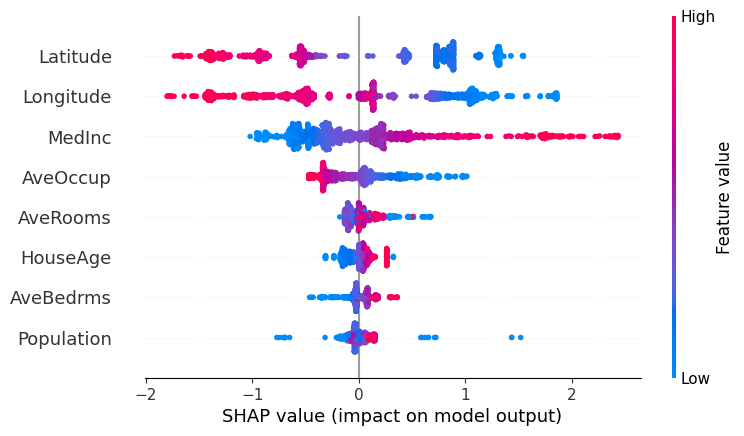

In [17]:
# the beeswarm plot displays SHAP values for each feature across all examples,
# with colors indicating how the SHAP values correlate with feature values
shap.plots.beeswarm(shap_values_ebm)

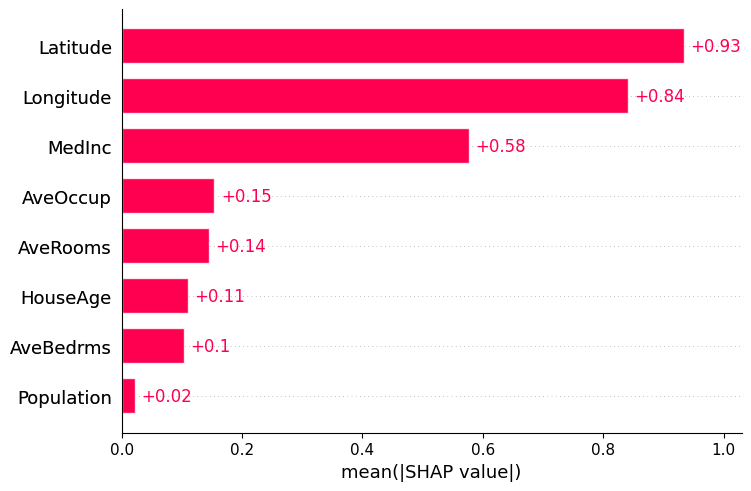

In [ ]:
#By default a SHAP bar plot will take the mean absolute value of each feature over all the instances (rows) of the dataset.

shap.plots.bar(shap_values)